In [0]:
#!pip install librosa
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

#from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM, Activation, Dense,  Embedding

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

from keras import regularizers
import os
import pandas as pd
from google.colab import drive
!apt install ffmpeg

Using TensorFlow backend.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.4-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [0]:
def extract_feature(file_name, offst=0.5):
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast',offset=offst)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

def extract_feature_lite(file_name):
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast', sr=None)
    #print("sample rate:", sample_rate, '\n')
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64).T, axis=0)
    
    return mfccs

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
samples = os.listdir('drive/My Drive/Colab Notebooks/RawData')
len(samples)

1440

In [0]:
feeling_list_gender=[]
for item in samples:
    
    if item[6:-16]=='01' and int(item[18:-4])%2==0:
        feeling_list_gender.append('female_not_stressed')
    elif item[6:-16]=='01' and int(item[18:-4])%2==1:
        feeling_list_gender.append('male_not_stressed')
    
    elif item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list_gender.append('female_not_stressed')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list_gender.append('male_not_stressed')
    
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list_gender.append('female_not_stressed')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list_gender.append('male_not_stressed')
    
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list_gender.append('female_stressed')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list_gender.append('male_stressed')
    
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list_gender.append('female_stressed')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list_gender.append('male_stressed')
    
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list_gender.append('female_stressed')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list_gender.append('male_stressed')
    
    elif item[6:-16]=='07' and int(item[18:-4])%2==0:
        feeling_list_gender.append('female_not_stressed')
    elif item[6:-16]=='07' and int(item[18:-4])%2==1:
        feeling_list_gender.append('male_not_stressed')
    
    elif item[6:-16]=='08' and int(item[18:-4])%2==0:
        feeling_list_gender.append('female_not_stressed')
    elif item[6:-16]=='08' and int(item[18:-4])%2==1:
        feeling_list_gender.append('male_not_stressed')

In [0]:
len(feeling_list_gender)

1440

In [0]:
feeling_list=[]
for item in samples:
    
    if item[6:-16]=='01' and int(item[18:-4])%2==0:
        feeling_list.append('not_stressed')
    elif item[6:-16]=='01' and int(item[18:-4])%2==1:
        feeling_list.append('not_stressed')
    
    elif item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('not_stressed')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('not_stressed')
    
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('not_stressed')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('not_stressed')
    
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('stressed')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('stressed')
    
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('stressed')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('stressed')
    
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('stressed')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('stressed')
    
    elif item[6:-16]=='07' and int(item[18:-4])%2==0:
        feeling_list.append('not_stressed')
    elif item[6:-16]=='07' and int(item[18:-4])%2==1:
        feeling_list.append('not_stressed')
    
    elif item[6:-16]=='08' and int(item[18:-4])%2==0:
        feeling_list.append('not_stressed')
    elif item[6:-16]=='08' and int(item[18:-4])%2==1:
        feeling_list.append('not_stressed')

In [0]:
len(feeling_list)

1440

In [0]:
labels = pd.DataFrame(feeling_list)
labels_gender = pd.DataFrame(feeling_list_gender)

In [0]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index, y in enumerate(samples):
  
    mfccs = extract_feature_lite('drive/My Drive/Colab Notebooks/RawData/'+y)

    feature = mfccs
    df.loc[bookmark] = [feature]
    bookmark=bookmark+1

    if bookmark % 100 == 0:
      print(bookmark)
print("the end")

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
the end


In [0]:
examples = os.listdir('drive/My Drive/Colab Notebooks/saved_models/Examples')
len(examples)

12

In [0]:
df_ex = pd.DataFrame(columns=['feature'])
bookmark=0
srs = []
for index, y in enumerate(examples):
  
    mfccs, sr = extract_feature_lite('drive/My Drive/Colab Notebooks/saved_models/Examples/'+y)
    srs.append(sr)
    feature = mfccs
    df_ex.loc[bookmark] = [feature]
    bookmark=bookmark+1

    if bookmark % 100 == 0:
      print(bookmark)
print("the end")

In [0]:
len(df_ex.loc[0][0])

30

In [0]:
df3_ex = pd.DataFrame(df_ex['feature'].values.tolist())
labels_ex = pd.DataFrame(examples)
srs_ex = pd.DataFrame(srs)
newdf_ex = pd.concat([df3_ex, labels_ex, srs_ex], axis=1)

In [0]:
rnewdf_ex = newdf_ex.rename(index=str, columns={"0": "label"})
rnewdf_ex = rnewdf_ex.fillna(0)

In [0]:
rnewdf_ex.to_csv("drive/My Drive/Colab Notebooks/saved_models/Examples/Examples_MFCC.csv", sep='\t', encoding='utf-8')

In [0]:
import pandas as pd
train_reader = pd.read_table("drive/My Drive/Colab Notebooks/Features/ENG8_STRESS_64MFCC_GENDER.csv", sep='\t', encoding='utf-8')
rnewdf = pd.DataFrame(train_reader)
rnewdf = rnewdf.drop(columns=['Unnamed: 0']) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [0]:
len(df.loc[0][0])

30

In [0]:
df3 = pd.DataFrame(df['feature'].values.tolist())

newdf = pd.concat([df3,labels], axis=1)
newdf_gender = pd.concat([df3,labels_gender], axis=1)

rnewdf = newdf.rename(index=str, columns={"0": "label"})
rnewdf_gender = newdf_gender.rename(index=str, columns={"0": "label"})


from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf_gender = shuffle(newdf_gender)

rnewdf=rnewdf.fillna(0)
rnewdf_gender=rnewdf_gender.fillna(0)
#rnewdf

In [0]:
rnewdf.to_csv("drive/My Drive/Colab Notebooks/Features/ENG8_STRESS_64MFCC.csv", sep='\t', encoding='utf-8')
rnewdf_gender.to_csv("drive/My Drive/Colab Notebooks/Features/ENG8_STRESS_64MFCC_GENDER.csv", sep='\t', encoding='utf-8')

In [0]:
rnewdf.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,0.1
0,-628.481250,83.720636,3.103694,14.209134,8.273428,16.429736,3.999814,1.459396,-8.022567,3.545374,...,3.629655,3.427313,2.764825,2.865849,1.522869,1.297290,1.676922,0.648477,1.723540,male_stressed
1,-519.894684,60.835354,-20.856232,-6.538954,-10.295874,0.775197,-19.840965,-5.214007,-10.483443,-14.694821,...,0.120656,1.008535,0.719937,0.546650,-0.034688,-0.793124,-0.405453,0.746836,0.881674,female_stressed
2,-680.059723,73.784591,3.922013,10.956748,3.068671,16.663213,-4.471333,3.705004,-3.772835,-2.552420,...,-0.589465,-0.778683,-0.644382,-0.374399,-0.245838,-0.144239,-0.288894,0.287441,-0.217643,male_not_stressed
3,-564.211860,54.754709,-12.062169,5.610564,-5.497679,5.011449,-10.285003,-4.891610,-3.626669,-6.795849,...,-0.012573,-0.364115,0.210427,0.703526,0.183680,-0.402481,-0.828882,-1.098595,0.127968,male_not_stressed
4,-534.116874,78.029979,-2.253419,4.938453,-2.430040,7.737222,-10.021114,0.687168,-13.826915,-9.338982,...,-0.303363,-0.936624,-0.226617,-0.010656,0.373317,0.739897,-0.579542,-0.155554,-0.423452,female_stressed


In [0]:
import pandas as pd
train_reader = pd.read_table("drive/My Drive/Colab Notebooks/Features/ENG8_STRESS_64MFCC_GENDER.csv", sep='\t', encoding='utf-8')
file_train_df = pd.DataFrame(train_reader)

rnewdf = file_train_df.drop(columns=['Unnamed: 0'])




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [0]:
newdf1 = np.random.rand(len(rnewdf)) > 0.2

train = rnewdf[newdf1]
test = rnewdf[~newdf1]

print(len(train), len(test))

1166 274


In [0]:
train.to_csv("drive/My Drive/Colab Notebooks/Features/ENG8_STRESS_64MFCC_GENDER_TRAIN.csv", sep='\t', encoding='utf-8')

In [0]:
test.to_csv("drive/My Drive/Colab Notebooks/Features/ENG8_STRESS_64MFCC_GENDER_TEST.csv", sep='\t', encoding='utf-8')

In [0]:
import pandas as pd
train_reader = pd.read_table("drive/My Drive/Colab Notebooks/Features/ENG8_STRESS_64MFCC_GENDER_TRAIN.csv", sep='\t', encoding='utf-8')
file_train_df = pd.DataFrame(train_reader)

#file_train_df = file_train_df[file_train_df['0.1'] != 'bored']
#file_train_df = file_train_df[file_train_df['0.1'] != 'disgusted']
train = file_train_df.drop(columns=['Unnamed: 0'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [0]:
test_reader = pd.read_table("drive/My Drive/Colab Notebooks/Features/ENG8_STRESS_64MFCC_GENDER_TEST.csv", sep='\t', encoding='utf-8')
file_test_df = pd.DataFrame(test_reader)

test = file_test_df.drop(columns=['Unnamed: 0'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [0]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]

testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [0]:
trainlabel [ trainlabel == 'male_not_stressed'] = 'not_stressed'
trainlabel [ trainlabel == 'female_not_stressed'] = 'not_stressed'

trainlabel [ trainlabel == 'male_stressed'] = 'stressed'
trainlabel [ trainlabel == 'female_stressed'] = 'stressed'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [0]:
testlabel [ testlabel == 'male_not_stressed'] = 'not_stressed'
testlabel [ testlabel == 'female_not_stressed'] = 'not_stressed'

testlabel [ testlabel == 'male_stressed'] = 'stressed'
testlabel [ testlabel == 'female_stressed'] = 'stressed'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [0]:
print(trainlabel.shape, testlabel.shape)

(1166, 1) (274, 1)


In [0]:
trainlabel[0:5]

,0.1
0,stressed
1,stressed
2,not_stressed
3,not_stressed
4,stressed


In [0]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)

X_test = np.array(testfeatures)
y_test = np.array(testlabel)

print(X_train.shape)
print(X_test.shape)

y_train = np.squeeze(y_train, axis=(1,))
y_test = np.squeeze(y_test, axis=(1,))

(1166, 64)
(274, 64)


In [0]:
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))

In [0]:
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [0]:
print(y_train.shape)
print(y_test.shape)
print(y_train)

(1166, 2)
(274, 2)
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [0]:
np.save('drive/My Drive/Colab Notebooks/saved_models/2class_ENG-stress_gender-classes.npy', lb.classes_)

In [0]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)
#x_validcnn = np.expand_dims(X_valid, axis=2)
print(x_traincnn.shape)
print(x_testcnn.shape)
#print(x_validcnn.shape)

(1166, 64, 1)
(274, 64, 1)


In [0]:
from keras.layers.normalization import BatchNormalization
#CNN 88.19% na 300
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(x_traincnn.shape[1],1)))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(BatchNormalization())

model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
''' 80.18 s blokom i bez'''
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same',))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())

model.add(Dense(2))
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Activation('softmax'))

#model.summary()

In [0]:
from keras.layers.normalization import BatchNormalization
#CNN 84.14% na 300
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(x_traincnn.shape[1],1)))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(BatchNormalization())

model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
''' 80.18 s blokom i bez'''
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same',))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())

model.add(Dense(4))
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Activation('softmax'))

#model.summary()

In [0]:
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
opt1 = keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)


In [0]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [0]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=32, epochs=300, validation_data=(x_testcnn, y_test))

Train on 1166 samples, validate on 274 samples
Epoch 1/1
1166/1166 [==============================] - 2s 2ms/step - loss: 0.2100 - acc: 0.9648 - val_loss: 0.3416 - val_acc: 0.8431


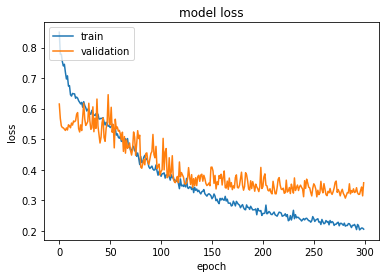

In [0]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 84.67%


In [0]:
model_name = 'Stress_recog_64MFCC_without_gender.h5'
save_dir = os.path.join('drive/My Drive/Colab Notebooks/', 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at drive/My Drive/Colab Notebooks/saved_models/Stress_recog_64MFCC_without_gender.h5 


In [0]:
import json
model_json = model.to_json()
with open("drive/My Drive/Colab Notebooks/saved_models/Stress_recog_64MFCC_without_gender.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('drive/My Drive/Colab Notebooks/saved_models/Stress_recog_64MFCC_without_gender.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("drive/My Drive/Colab Notebooks/saved_models/Stress_recog_64MFCC_without_gender.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 84.67%


In [0]:
import pandas as pd

y_pred = loaded_model.predict(x_testcnn)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
  yy.append(np.argmax(j))
print(len(yy))

for j in y_test:
  ya.append(np.argmax(j))
from sklearn.metrics import confusion_matrix

confusion_matrix(ya, yy)

(274, 2)
274


array([[143,  30],
       [ 12,  89]])

In [0]:
lb.classes_

array(['not_stressed', 'stressed'], dtype=object)

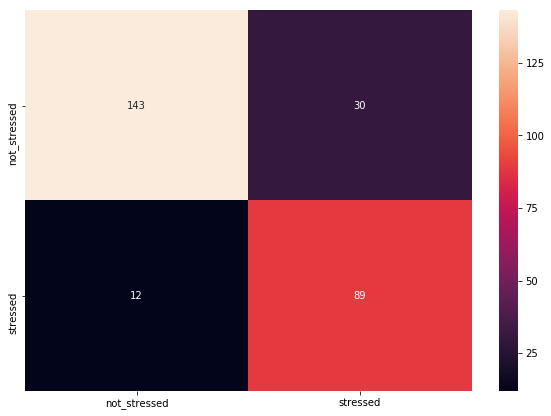

In [0]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = confusion_matrix(ya, yy)
#print(array)

listik = ['not_stressed', 'stressed']

df_cm = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
plt.figure(figsize = (10,7))

sn.heatmap(df_cm, annot=True, fmt='g')
plt.show()